准备：pip install yellowbrick

### 1.1 广义回归线性方程前提



### 2.1 Single linear regression 一元线性回归方程

##### 2.1.1算法介绍
https://baike.baidu.com/item/%E4%B8%80%E5%85%83%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92%E6%96%B9%E7%A8%8B/6953911
https://www.jianshu.com/p/7900c7f647b7

系数优化 https://www.cnblogs.com/xunziji/p/7366580.html

##### 2.1.2评估标准
MSE, RMSE, MAPE, R2, 

https://sweetcode.io/simple-multiple-linear-regression-python-scikit/

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Livia\Desktop\Cniao\PYTHON Cniao\regression\data\mpg.csv')

In [4]:
df.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [5]:
#清洗数据：去掉缺失值
#把数据中的问号换成空值，并去掉
df = df.replace('?', np.nan)
df = df.dropna()

In [6]:
#去掉不相关的变量
df = df.drop(['name','origin','model_year'], axis=1)
X = df.drop('mpg', axis=1)
y = df[['mpg']]

In [7]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration
0,8,307.0,130,3504,12.0
1,8,350.0,165,3693,11.5
2,8,318.0,150,3436,11.0
3,8,304.0,150,3433,12.0
4,8,302.0,140,3449,10.5


In [8]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


拟合模型

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [25]:
#训练模型
X_train_single=X_train[['horsepower']]

reg = LinearRegression()
reg.fit(X_train_single, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
#预测结果
X_test_single=X_test[['horsepower']]
y_predicted = reg.predict(X_test_single)

In [27]:
X_test_single.head()

,horsepower
82,97
167,75
356,75
120,112
385,67


In [19]:
#拟合表现
print("Mean squared error: ",  mean_squared_error(y_test, y_predicted))
print('R²: ', r2_score(y_test, y_predicted))

Mean squared error:  28.66013202298902
R²:  0.5865667722428771


R2:评估所有得模型得表现，从0-1。表示模型能够解释原数据集中数据波动的比例。（规律/信息）
adj R2:调整R方 （变量数很多的时候）

#####  2.1.3残差图及其假设 Residual plot


一、关于残差的假设H0。    残差 = Y-Y的预测值<p>

- 残差服从正态分布
- 均值为0，固定方差  （残差应该围绕着0左右摇摆）<p>
- 残差和Y的预测值的协方差为0 （表示残差和Y的预测值不相关） - 内生性 <p>

满足这个则说明模型OK了，不满足则需要继续处理模型。

二、理想的残差图：
- 在0上下对称分布
- 椭圆形
- 无规律，无趋势。

三、处理内生性：<p>
- 调整方程：通过观察残差图的趋势来确认如何调整方程：1.线性，方程缺少X   <p>
- U性，方程缺少X2  <p> 
- 出现交叉 缺X1*X2 <p> 
  <p>

四、如何处理内生性： <p>
- 小数据，出现内生性 –> Y做对数处理  <p>
- 大数据，出现内生性 -> 找更多X  <p>


In [20]:
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot

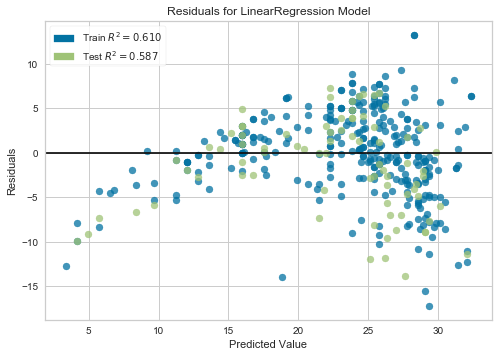

In [30]:
visualizer = ResidualsPlot(reg,hist=False)
visualizer.fit(X_train_single, y_train)  # 拟合模型
visualizer.score(X_test_single, y_test)  # 预测新数据并打分
visualizer.poof()   

### 2.2 Multivariate linear regression  多元线性回归

##### 2.2.1 算法介绍

https://baike.baidu.com/item/%E5%A4%9A%E5%85%83%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92/10702248?fr=aladdin

系数优化 http://www.it610.com/article/1776454.htm

##### 2.2.2 评估标准
MSE, RMSE, MAPE, R2, 

In [22]:
X_train_multi.head()

,horsepower,weight,cylinders
338,84,2490,4
260,110,3620,6
141,83,2219,4
312,65,2019,4
353,74,2190,4


In [31]:
#拟合模型

X_train_multi=X_train[['horsepower','weight','cylinders']]
X_test_multi=X_test[['horsepower','weight','cylinders']]

reg = LinearRegression()
reg.fit(X_train_multi, y_train)
y_predicted = reg.predict(X_test_multi)

In [32]:
#拟合表现
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))
print('R²: %.2f' % r2_score(y_test, y_predicted))

Mean squared error: 19.12
R²: 0.72


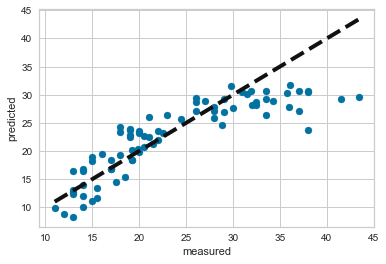

In [65]:
#可视化

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

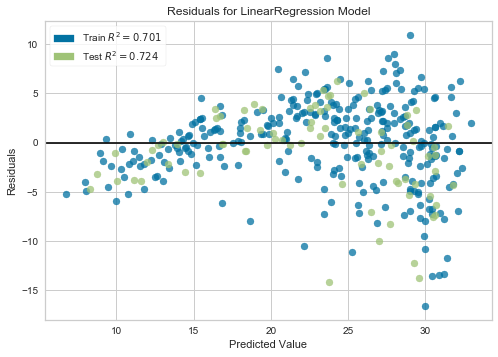

In [33]:
#残差图

visualizer = ResidualsPlot(reg,hist=False)
visualizer.fit(X_train_multi, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_multi, y_test)  # Evaluate the model on the test data
visualizer.poof()   

### 2.3 逻辑回归

#### 2.3.1 算法介绍

#### 适用场景：

##### 预测事件是否发生（预测事情发生的概率）。发生=1，不发生=0. Y变量 = binary variable, 二值型。 <p>
    
- 预测一个用户是否信用卡违约  
- 预测一个演员是否赢的奥斯卡 
- 目前的候选人是否进入中期选举 
- 中西部的某个城市经济（GDP）十年之内超过东边平均GDP？
- 预测某些国家是否能跨越中等收入陷阱？
- 预测这一批癌症病人5年内是否幸存？

##### 预测未来的一个数值。
- 预测一个用户接下来1年内信用卡积累消费额？  2.预测候选人在这次总统选举一共获得多少选票？
- 中部的某个城市经济（GDP）2030年GDP？

##### 2.3.2  公式及参数估计

公式：https://blog.csdn.net/pql925/article/details/79021464

参数估计：最大似然法
https://blog.csdn.net/zengxiantao1994/article/details/72787849

##### 2.3.3 比赛介绍

比赛页面: https://www.kaggle.com/c/titanic

数据下载: https://www.kaggle.com/c/titanic/data

##### 2.3.4 背景信息

1912年4月15日凌晨，皇家邮轮泰坦尼克号(RMS Titanic)从南安普敦(Southampton)首航4天后沉没，这是历史上和平时期最严重的海上灾难之一，造成逾1500人死亡。泰坦尼克号是当时最大的客轮，在北大西洋撞上冰山时，船上估计有2224人。这艘船已收到六次海冰警告，但当瞭望员看到冰山时，它正以接近最高速度航行。由于转得不够快，这艘船受到了侧击，右舷(右)侧发生了弯曲，16个舱室中有5个向大海打开。这场灾难引发了人们对缺乏救生艇、监管松懈以及疏散过程中对三个乘客阶层的不平等待遇的普遍愤怒。调查建议对海事规则进行全面修改，从而产生了《国际海上生命安全公约》(1914年)，该公约继续管理海事安全。

泰坦尼克号的沉没是历史上最臭名昭著的沉船事件之一。1912年4月15日，泰坦尼克号在处女航中撞上冰山沉没，2224名乘客和船员中1502人遇难。这一耸人听闻的悲剧震惊了国际社会，并导致了更好的船舶安全条例。

沉船造成如此巨大人员伤亡的原因之一是没有足够的救生艇来容纳乘客和船员。虽然在沉船事件中幸存下来也有一些运气的因素，但有些人比其他人更有可能幸存下来，比如妇女、儿童和上层阶级。

在这个挑战中，我们要求你完成对可能存活下来的人的分析。我们特别要求你们运用机器学习工具来预测哪些乘客在灾难中幸存下来。

###### 2.3.5 目标
你的工作是预测泰坦尼克号沉没时是否有乘客生还。
对于测试集中的每个变量，必须预测变量的值为0或1。

##### 2.3.6 评估标准

你的分数是你正确预测的乘客百分比。这就是所谓的“准确性”（Accuracy）。


#### Accuracy准确性 = (TP+TN)/(TP+TN+FP+FN)    Where TP = True positive; FP = False positive; TN = True negative; FN = False negative


reference：https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification

其他指标

- AccuracyRate(准确率): (TP+TN)/(TP+TN+FN+FP)

- ErrorRate(误分率): (FN+FP)/(TP+TN+FN+FP) 又叫Misclassification rate

- Recall(召回率，查全率,击中概率): TP/(TP+FN), 在所有GroundTruth为正样本中有多少被识别为正样本了;

- Precision(查准率):TP/(TP+FP),在所有识别成正样本中有多少是真正的正样本；

- TPR(TruePositive Rate): TP/(TP+FN),实际就是Recall

- FAR(FalseAcceptance Rate)或FPR(False Positive Rate)：FP/(FP+TN)， 错误接收率，误报率，在所有GroundTruth为负样本中有多少被识别为正样本了;

- FRR(FalseRejection Rate): FN/(TP+FN)，错误拒绝率，拒真率，在所有GroundTruth为正样本中有多少被识别为负样本了，它等于1-Recall

- ROC

- R2

##### 2.3.7数据介绍

    变量           |       含义            

    survival	   |   是否幸存	         
    pclass	     |   票等级 1 = 1st, 2 = 2nd, 3 = 3rd
    Sex	        |   性别               	
    Age	        |   年龄	
    sibsp	      |   船上兄妹/配偶数量	
    parch	      |   船上父母/孩子的数量
    ticket	     |   船票号
    fare	       |   乘客费用	
    cabin	      |   船舱号
    embarked	   |   出发港 C = Cherbourg, Q = Queenstown, S = Southampton

###### 2.3.8 补充说明

pclass: 代表社会经济的地位
1st = Upper
2nd = Middle
3rd = Lower

age: 年龄

sibsp: 兄弟姐妹的关系
Sibling = 亲生哥哥，姐姐，弟弟，妹妹或者同父异母或者同母异父的兄妹
Spouse = 配偶

parch: 家庭关系
Parent = 父母
Child = 女儿，儿子，继女，继子
如果和保姆/管家一起旅行, 则parch=0 .

https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python

##### 2.4.1 EDA及数据清洗  EDA and data cleaning

In [34]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

In [36]:
# 读取数据
train_df = pd.read_csv(r'C:\Users\Livia\Desktop\Cniao\PYTHON Cniao\regression\data\train.csv')                    
                       
# 读取数据
test_df = pd.read_csv(r'C:\Users\Livia\Desktop\Cniao\PYTHON Cniao\regression\data\test.csv')

In [37]:
# EDA
import pandas_profiling

train_df.profile_report(title='Titanic - Training set')

AttributeError: module 'numpy' has no attribute 'printoptions'

根据以上的信息，对含有缺失值的变量作以下的处理：


Age: 用Age的中位数28填补缺失值

Embark: 用最常见的登录港口“S”填补

Cabin：缺失值太多，去掉这个变量。不过从以上关联矩阵可以看出，Cabin和Class有一定相关的

In [38]:
#数据清洗 

train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [39]:
# 清洗过的数据，检查缺失值个数

train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

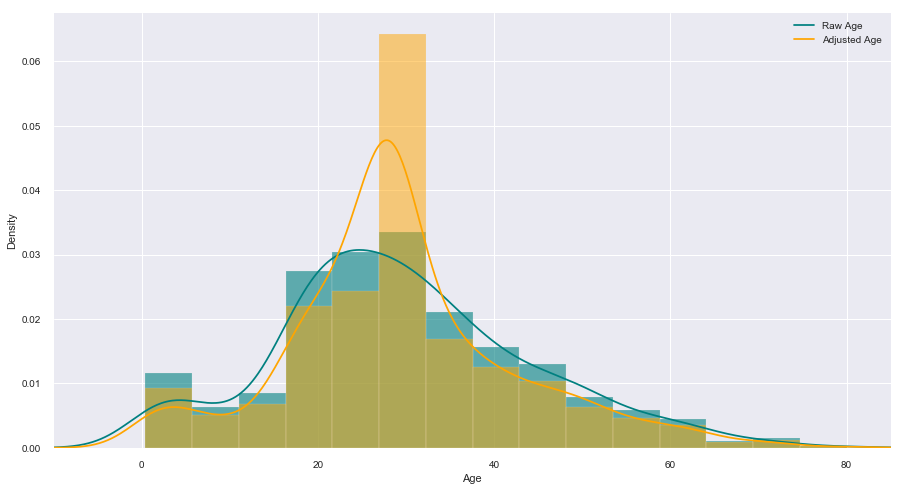

In [40]:
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

##### 2.4.2 特征工程 Feature engineering

根据之前的数据解释，SibSp和Parch都表示同行的家庭成员。因此我们为了去除潜在的多重共线性，我们单独设置一个分类变量“TravelAlone”表示该乘客是和至少一个家庭成员同行或是独自旅行。

In [41]:
# 特征工程
# 检查旅行人数，转为分类变量

train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

同时也给Pclass,Sex,Embarked三个分类变量进行转码
-- 了解独热编码 https://zhuanlan.zhihu.com/p/37471802

In [42]:
#转为分类变量，去掉一些不相关变量

training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,PassengerId,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,1,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,2,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,3,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,4,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,5,0,35.0,8.0500,1,0,0,1,0,0,1,1


上面的处理是对TRAIN集做的，接下来要对TEST集做同样的操作：
    1. 给Age的缺失值填补上中位数28
    2. 移除Cabin变量
    3. 给Emberked缺失的变量填补上S
    4. 给Fare的中位数填补中位数14.45
    5. 给其他分类变量做独热编码


In [43]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [44]:
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,PassengerId,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,892,34.5,7.8292,1,0,0,1,0,1,0,1
1,893,47.0,7.0000,0,0,0,1,0,0,1,0
2,894,62.0,9.6875,1,0,1,0,0,1,0,1
3,895,27.0,8.6625,1,0,0,1,0,0,1,1
4,896,22.0,12.2875,0,0,0,1,0,0,1,0


In [45]:
final_train['IsMinor']=np.where(final_train['Age']<=17, 1, 0)
final_test['IsMinor']=np.where(final_test['Age']<=17, 1, 0)

In [46]:
final_train.head()

,PassengerId,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,1,0,22.0,7.2500,0,0,0,1,0,0,1,1,0
1,2,1,38.0,71.2833,0,1,0,0,1,0,0,0,0
2,3,1,26.0,7.9250,1,0,0,1,0,0,1,0,0
3,4,1,35.0,53.1000,0,1,0,0,0,0,1,0,0
4,5,0,35.0,8.0500,1,0,0,1,0,0,1,1,0


##### 2.4.3 特征选择 Feature selection


为什么要选择变量？

1.过度拟合：CURSE OF DIMENSIONALITY 维度诅咒: 维数灾难(Curse of Dimensionality)：通常是指在涉及到向量的计算的问题中，随着维数的增加，计算量呈指数倍增长，每个维度内数据变得很稀疏，是模型的预测能力下降。

2．多重共线性：多个变量提供了重复的信息。（逻辑回归不能容忍多重共线性）
回归中的多重共线性是一个当模型中一些预测变量与其他预测变量严重相关。严重的多重共线性可能会导致的一些后果：
- 使本来显著的变量不显著；或者让本来不显著的变量变得显著
- 改变系数的值，严重情况下甚至改变了系数的方向。



逻辑回归可以手动选择变量（相关分析，主成分分析，卡方检验等）。数据集变量大于30就可以用算法选择变量。逻辑回归选择变量：forward, backward or stepwise  逐步回归



递归特性消除

递归特征消除(RFE)是通过递归地考虑越来越小的特征集来选择特征。首先，对估计器进行初始特征集的训练，通过coef_属性或feature_importances_属性获得每个特征的重要性。然后，从当前的一组特性中删除最不重要的特性。该过程在修剪集上递归地重复，直到最终达到所需的要选择的特性数量。

References: 
http://scikit-learn.org/stable/modules/feature_selection.html 

In [18]:
final_train.head()

,PassengerId,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,1,0,22.0,7.2500,0,0,0,1,0,0,1,1,0
1,2,1,38.0,71.2833,0,1,0,0,1,0,0,0,0
2,3,1,26.0,7.9250,1,0,0,1,0,0,1,0,0
3,4,1,35.0,53.1000,0,1,0,0,0,0,1,0,0
4,5,0,35.0,8.0500,1,0,0,1,0,0,1,1,0


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X = final_train[cols]
y = final_train['Survived']

# 建立逻辑回归模型，并且计算变量重要性
model = LogisticRegression()

rfe = RFE(model, 9)
rfe = rfe.fit(X, y)

# 列出被选中的变量
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


使用递归特征消除和交叉验证对特征进行排序。
RFECV在交叉验证循环中执行RFE，以找到最优数量或最佳特性数量。此后，将递归特征消除应用于逻辑回归，并通过交叉验证自动调整所选特征的数量。

Optimal number of features: 8
Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


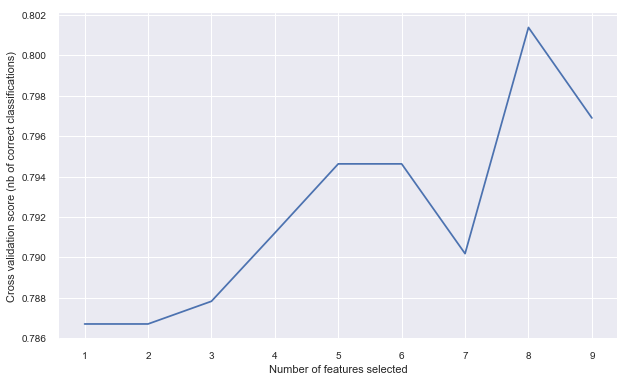

In [68]:
from sklearn.feature_selection import RFECV

# 计算交叉验证分数

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# 计算被选的特征数量和对应的交叉验证分数之间的关系
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

当变量的数量为8个的时候，交叉验证的结果最好，所以最后保留了8个变量。

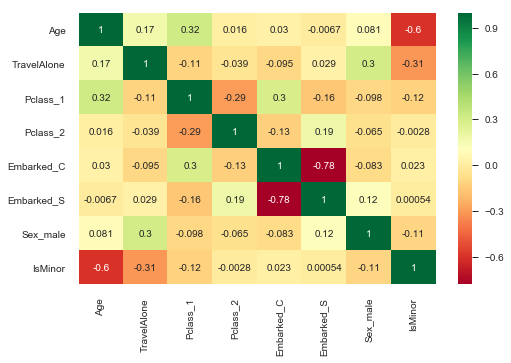

In [69]:
Selected_features = ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']
X = final_train[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

##### 2.4.4 拟合模型  Fit model

In [70]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = final_train[Selected_features]
y = final_train['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

In [71]:
# 拟合模型
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

In [72]:
#拟合指标
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(" accuracy is ",accuracy_score(y_test, y_pred))
print(" log_loss is ",log_loss(y_test, y_pred_proba))
print(" auc is ",auc(fpr, tpr))

Train/Test split results:
 accuracy is  0.8
 log_loss is  0.4470795030923159
 auc is  0.8566176470588236


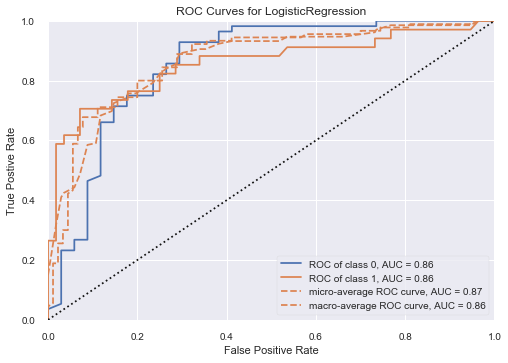

In [54]:
#ROC

from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(logreg)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof()                       # Draw/show/poof the data

##### 2.3.5 变量重要性及系数 Feature importance and Coefficient

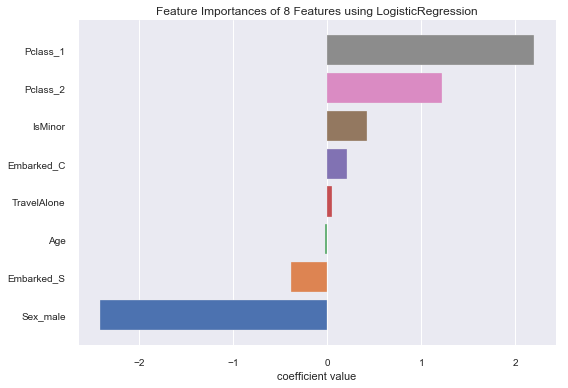

In [55]:
#变量重要性

from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(logreg, stack=False, relative=False)
viz.fit(X_train, y_train)
viz.poof()

In [61]:
#变量系数及含义

coef_dict = {}
for coef, feat in zip(logreg.coef_[0,:],Selected_features):
    coef_dict[feat] = coef
    
print(coef_dict)

{'Age': -0.026350333450543818, 'TravelAlone': 0.05187489754471469, 'Pclass_1': 2.196275612195445, 'Pclass_2': 1.2161351092362014, 'Embarked_C': 0.21373883591252354, 'Embarked_S': -0.38375302598551947, 'Sex_male': -2.413567596506031, 'IsMinor': 0.4247439286776801}


In [62]:
coef=pd.DataFrame.from_dict(coef_dict,orient ='index',columns=['Coefficient'])
coef

,Coefficient
Age,-0.026350
TravelAlone,0.051875
Pclass_1,2.196276
Pclass_2,1.216135
Embarked_C,0.213739
Embarked_S,-0.383753
Sex_male,-2.413568
IsMinor,0.424744


In [63]:
coef=coef.reset_index()
coef.rename(columns={'index': 'Variable'}, inplace=True)
coef

,Variable,Coefficient
0,Age,-0.026350
1,TravelAlone,0.051875
2,Pclass_1,2.196276
3,Pclass_2,1.216135
4,Embarked_C,0.213739
5,Embarked_S,-0.383753
6,Sex_male,-2.413568
7,IsMinor,0.424744


In [64]:
coef['Prob Change']=np.exp(coef['Coefficient'])/(1+np.exp(coef['Coefficient']))
coef['Prob Change']=coef['Prob Change'].map(lambda n: '{:,.2%}'.format(n))   #百分比格式
coef

,Variable,Coefficient,Prob Change
0,Age,-0.026350,49.34%
1,TravelAlone,0.051875,51.30%
2,Pclass_1,2.196276,89.99%
3,Pclass_2,1.216135,77.14%
4,Embarked_C,0.213739,55.32%
5,Embarked_S,-0.383753,40.52%
6,Sex_male,-2.413568,8.21%
7,IsMinor,0.424744,60.46%


如果控制其他变量，age每增加1个单位，则用户幸存可能性会减少49%

如果控制其他变量，如果是TravelAlone=1(独自旅行），则幸存的概率比不独自旅行会增加51.3%

##### 2.3.6 混淆矩阵 Confusion matrix

https://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html

https://blog.csdn.net/chekongfu/article/details/86235791

https://www.jianshu.com/p/27228ad417d4

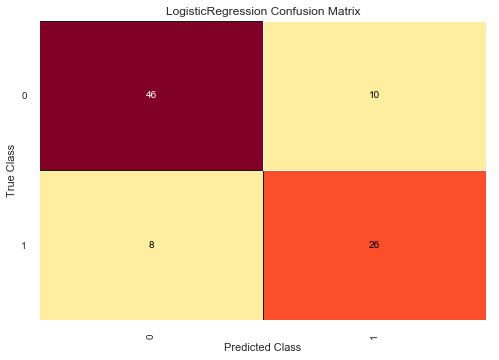

In [73]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(logreg, classes=[0,1])
cm.score(X_test, y_test)
cm.poof()

In [74]:
#Accuracy
accuracy_score(y_test, y_pred)

0.8

##### 2.3.7 改变截断值  Cutoff value

改变截断值产生不同的预测结果，产生不同的混淆矩阵，观察accuracy的改变。

适合不平衡的数据集unbalanced dataset


Prob 默认=0.5，你可以手动更改，一般来说Prob值越低，说明你最后结果的灵敏度（实际幸存，你也准确预测他幸存）人数会增高，相应的代价是，你会冤枉更多人（实际没有幸存，然后你预测他幸存）

In [93]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]
predicted=[1 if i > 0.7 else 0 for i in y_pred_proba]

In [84]:
print(y_pred_proba)
print(y_pred)
print(predicted)

[0.09545115 0.45586946 0.0787975  0.69581941 0.69333646 0.09775062
 0.89308567 0.06974907 0.44753184 0.07873758 0.2834758  0.13455081
 0.91983243 0.21039597 0.44753184 0.10249812 0.91585926 0.21038676
 0.08686331 0.90291974 0.49365784 0.75365532 0.08067032 0.91592287
 0.59637824 0.13764888 0.91792995 0.06800626 0.52141062 0.84402203
 0.94686336 0.63465997 0.48190613 0.77714911 0.21928471 0.08264625
 0.08264625 0.25086421 0.13455081 0.11154602 0.88191876 0.91925982
 0.48869417 0.07147829 0.50824781 0.06969551 0.07319098 0.72297676
 0.55435246 0.87428799 0.73868643 0.11679153 0.73339591 0.10009936
 0.06316378 0.83332984 0.18545514 0.48869417 0.06316378 0.14080668
 0.10494767 0.59637824 0.5176526  0.59552267 0.14070681 0.30089152
 0.71229879 0.58276711 0.07319098 0.58935974 0.59552267 0.19769467
 0.10017377 0.94817363 0.92668905 0.08466612 0.78182022 0.14070681
 0.16274849 0.48869417 0.07142351 0.81152227 0.27815426 0.05720656
 0.10009936 0.0787975  0.08884071 0.05584537 0.91519681 0.1521

In [94]:
cm1 = confusion_matrix(y_test, predicted)
print(cm1)

[[54  2]
 [13 21]]


In [95]:
print('Train/Test split results:')
print(" accuracy is ",accuracy_score(y_test,predicted))
print(" log_loss is ",log_loss(y_test,y_pred_proba))
print(" auc is " ,auc(fpr, tpr))

Train/Test split results:
 accuracy is  0.8333333333333334
 log_loss is  0.4470795030923159
 auc is  0.8566176470588236


##### 2.3.8 预测结果

In [96]:
final_test.head()

,PassengerId,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,892,34.5,7.8292,1,0,0,1,0,1,0,1,0
1,893,47.0,7.0000,0,0,0,1,0,0,1,0,0
2,894,62.0,9.6875,1,0,1,0,0,1,0,1,0
3,895,27.0,8.6625,1,0,0,1,0,0,1,1,0
4,896,22.0,12.2875,0,0,0,1,0,0,1,0,0


In [97]:
final_test.shape

(418, 12)

In [98]:
# 选择要使用的变量
final_test_clean = final_test[Selected_features]

In [99]:
# 产生初始预测
test_y_pred = logreg.predict(final_test_clean)
test_y_pred_proba= logreg.predict_proba(final_test_clean)[:, 1]

In [101]:
# 更改截断值，产生新预测
test_y_predicted=[1 if i > 0.7 else 0 for i in test_y_pred_proba]

In [102]:
print(test_y_pred)
print(test_y_pred_proba)
print(test_y_predicted)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
[0.10025018 0.3668191  0.15408077 0.08466612 0.52818783 0.1661344
 0.58363081 0.23326558 0.7042542  0.09326999 0.08264625 0.3351565
 0.90744218 0.10294

In [103]:
test_y_pred = pd.DataFrame(test_y_predicted)
test_y_pred_proba = pd.DataFrame(test_y_pred_proba)

##### 2.3.9 导出结果 Predict result

In [106]:
#产生预测结果

out = pd.DataFrame()
out = final_test["PassengerId"] 

In [107]:
out = pd.concat([out, test_y_pred, test_y_pred_proba], axis=1)

In [108]:
out.head()

,PassengerId,0,0
0,892,0,0.100250
1,893,0,0.366819
2,894,0,0.154081
3,895,0,0.084666
4,896,0,0.528188


In [109]:
out.to_csv(r'C:\Users\Livia\Desktop\Cniao\PYTHON Cniao\regression\data\prediction.csv', index=False)